<a href="https://colab.research.google.com/github/michelmalki/MichelMalki/blob/main/Used_Car_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#Load the chosen dataset into  Python environment.

import pandas as pd
import numpy as np
from google.colab import files
url = 'https://raw.githubusercontent.com/nabilbeit/McGill/main/Toyota_Used_Cars_.csv'
df = pd.read_csv(url)
print(df.head(10))


   Price  Age     KM FuelType   HP  MetColor  Automatic    CC  Doors  Weight  \
0  13500   23  46986   Diesel   90         1          0  2000      3    1165   
1  13750   23  72937   Diesel   90         1          0  2000      3    1165   
2  13950   24  41711   Diesel   90         1          0  2000      3    1165   
3  14950   26  48000   Diesel   90         0          0  2000      3    1165   
4  13750   30  38500   Diesel   90         0          0  2000      3    1170   
5  12950   32  61000   Diesel   90         0          0  2000      3    1170   
6  16900   27  94612   Diesel   90         1          0  2000      3    1245   
7  18600   30  75889   Diesel   90         1          0  2000      3    1245   
8  21500   27  19700   Petrol  192         0          0  1800      3    1185   
9  12950   23  71138   Diesel   69         0          0  1900      3    1105   

   Mileage  
0    29196  
1    45321  
2    25918  
3    29826  
4    23923  
5    37904  
6    58789  
7    47155  
8 

In [2]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])


Number of Rows: 1198
Number of Columns: 11


In [31]:
def cleandata(df):
  df.dropna(inplace=True)
  df.drop(columns=['KM'], inplace=True)
  return df
cleandata(df).head(5)

,Price,Age,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Mileage
0,13500,23,Diesel,90,1,0,2000,3,1165,29196
1,13750,23,Diesel,90,1,0,2000,3,1165,45321
2,13950,24,Diesel,90,1,0,2000,3,1165,25918
3,14950,26,Diesel,90,0,0,2000,3,1165,29826
4,13750,30,Diesel,90,0,0,2000,3,1170,23923


In [ ]:
category = len(df.select_dtypes(include=['object']).columns)
number = len(df.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', category, 'categorical', '+',
      number, 'numerical', '=', category+number, 'features')


Total Features:  1 categorical + 10 numerical = 11 features


In [ ]:
df.dtypes

Price         int64
Age           int64
KM            int64
FuelType     object
HP            int64
MetColor      int64
Automatic     int64
CC            int64
Doors         int64
Weight        int64
Mileage       int64
dtype: object

In [ ]:
print(df.isnull().sum())

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
Mileage      0
dtype: int64


In [ ]:
data_corr = df.corr()
data_corr

<ipython-input-125-1da0fe627a23>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr = df.corr()


,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Mileage
Price,1.000000,-0.877162,-0.625744,0.358160,0.121731,0.056805,0.142579,0.181321,0.575385,-0.625744
Age,-0.877162,1.000000,0.605178,-0.204268,-0.122013,-0.001329,-0.097737,-0.146070,-0.460701,0.605178
KM,-0.625744,0.605178,1.000000,-0.364532,-0.099636,-0.074100,0.309856,-0.049595,-0.041041,1.000000
HP,0.358160,-0.204268,-0.364532,1.000000,0.062693,0.037744,-0.020446,0.075380,0.066146,-0.364532
MetColor,0.121731,-0.122013,-0.099636,0.062693,1.000000,-0.019658,0.021566,0.083692,0.052818,-0.099635
Automatic,0.056805,-0.001329,-0.074100,0.037744,-0.019658,1.000000,-0.051455,-0.007032,0.065416,-0.074100
CC,0.142579,-0.097737,0.309856,-0.020446,0.021566,-0.051455,1.000000,0.111101,0.642878,0.309855
Doors,0.181321,-0.146070,-0.049595,0.075380,0.083692,-0.007032,0.111101,1.000000,0.285150,-0.049595
Weight,0.575385,-0.460701,-0.041041,0.066146,0.052818,0.065416,0.642878,0.285150,1.000000,-0.041042
Mileage,-0.625744,0.605178,1.000000,-0.364532,-0.099635,-0.074100,0.309855,-0.049595,-0.041042,1.000000


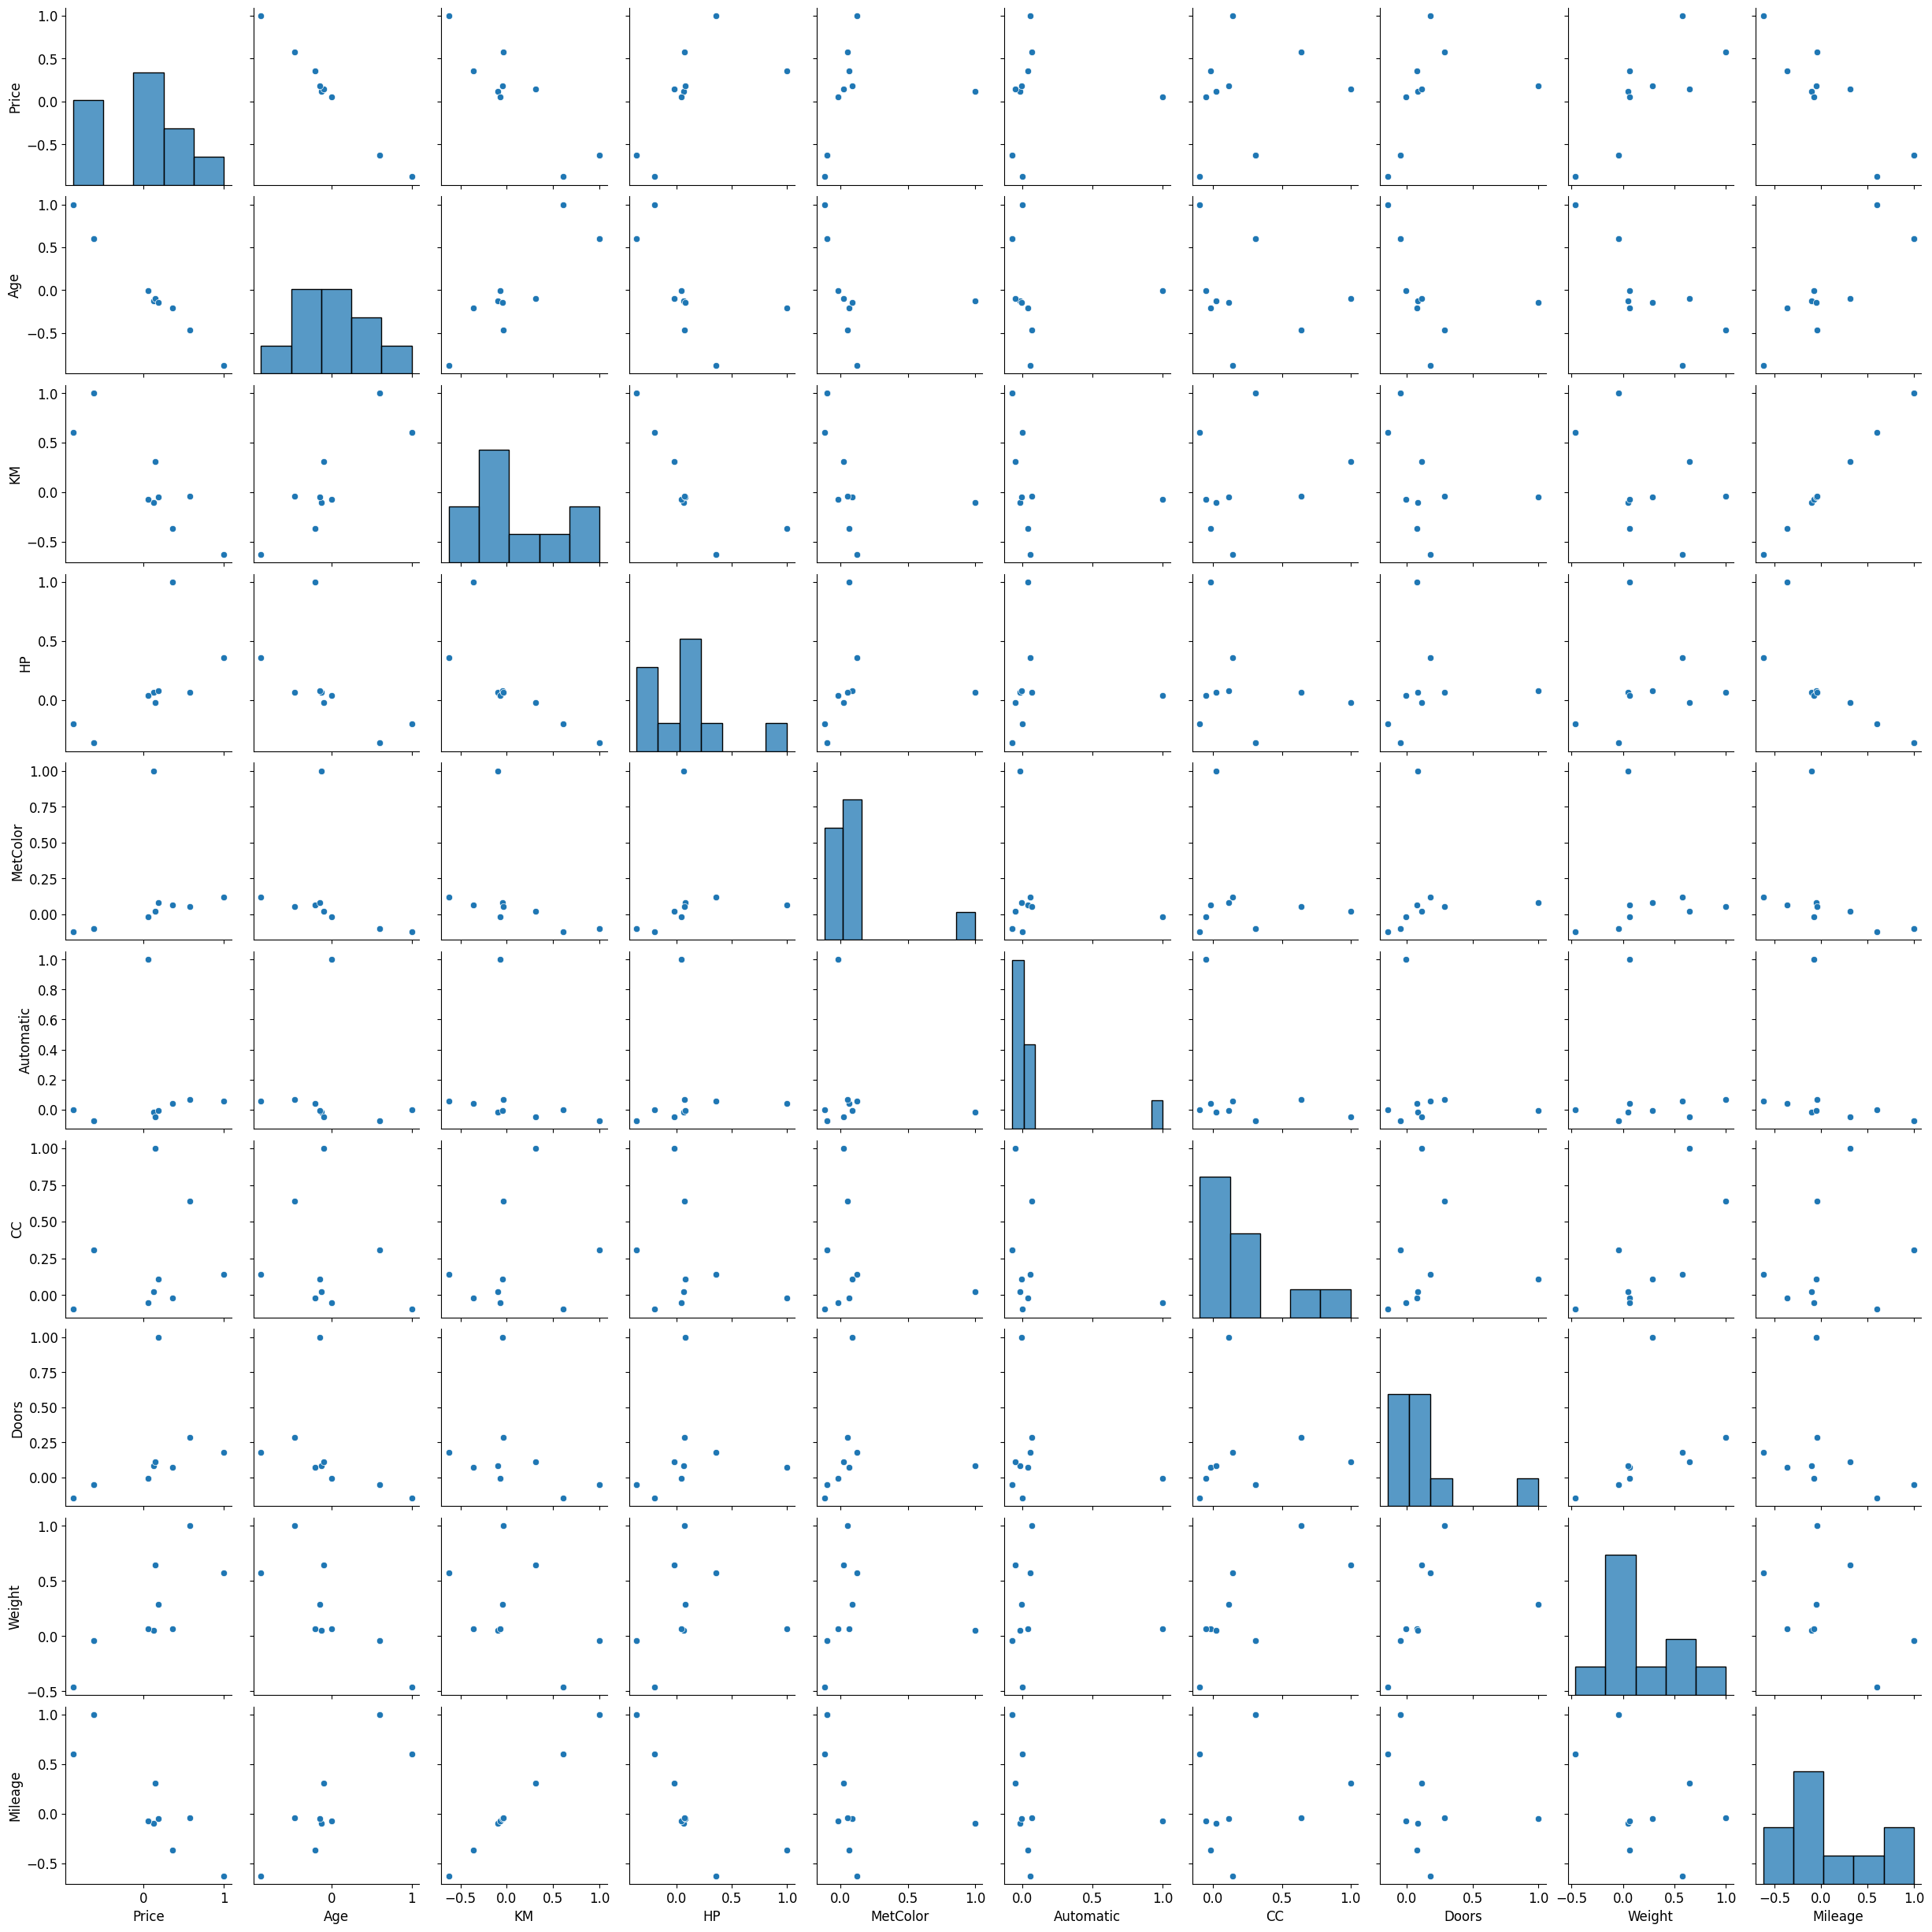

In [ ]:
# Creating the visualizations to support analysis.

sns.pairplot(data_corr)

<ipython-input-85-882cb0e7b8b7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


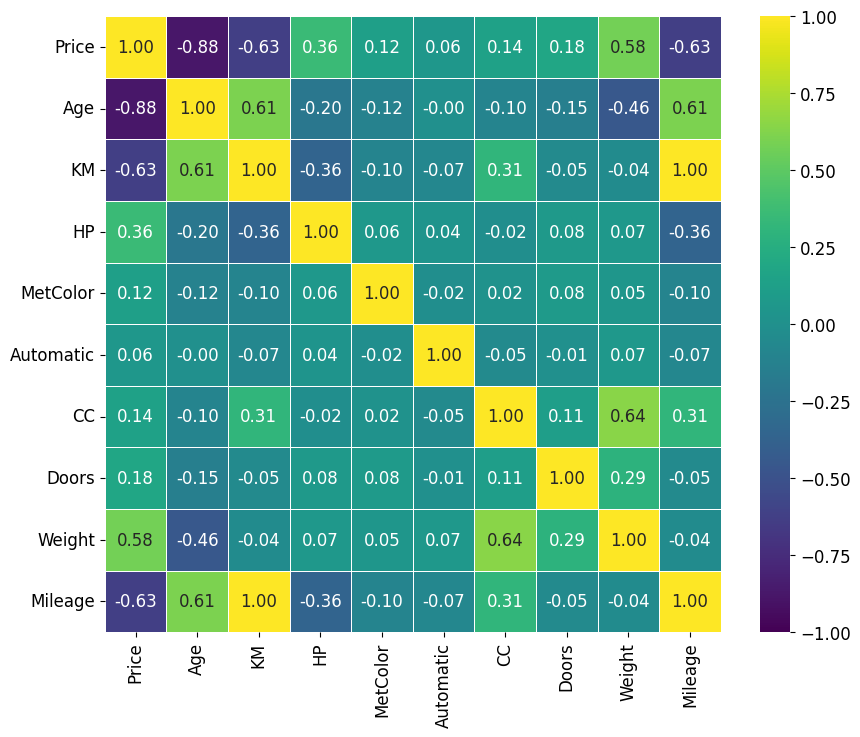

In [ ]:
# Creating the visualizations to support analysis.

import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()


In [ ]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Mileage
count,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000,1198.000000
mean,11243.260434,52.088481,69221.795492,101.343072,0.678631,0.048414,1576.191987,4.064274,1076.470785,43012.429048
std,3743.745345,17.951960,40363.040114,15.575509,0.467197,0.214729,192.441556,0.956030,55.531205,25080.404751
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,2.000000,1000.000000,1.000000
25%,8950.000000,41.000000,39458.250000,90.000000,0.000000,0.000000,1400.000000,3.000000,1040.000000,24518.000000
50%,10250.000000,56.000000,61988.500000,110.000000,1.000000,0.000000,1600.000000,4.000000,1070.000000,38518.000000
75%,12450.000000,65.000000,93059.250000,110.000000,1.000000,0.000000,1600.000000,5.000000,1100.000000,57824.750000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,5.000000,1615.000000,150993.000000


In [ ]:
# get_dummies() is a Pandas function performs one-hot encoding
# applying one-hot encoding to the relevant features.

from sklearn.preprocessing import OneHotEncoder
df_encoded = pd.get_dummies(df)
df_encoded.head()

# one-hot encoding helps prevent
# from assuming any ordinal relationship between
# categories and ensures that each category is treated independently.

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Mileage,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,29196,0,1,0
1,13750,23,72937,90,1,0,2000,3,1165,45321,0,1,0
2,13950,24,41711,90,1,0,2000,3,1165,25918,0,1,0
3,14950,26,48000,90,0,0,2000,3,1165,29826,0,1,0
4,13750,30,38500,90,0,0,2000,3,1170,23923,0,1,0


In [ ]:
# This code snippet prepares the data for machine learning modeling
# by separating the features from the target variable

data = df_encoded.drop('Price', axis = 1)
target = df_encoded['Price']

In [ ]:
print("Shape of x_train: ",data.shape)
print("Shape of y_train: " , target.shape)

# This output indicates that there are 1198 observations and 12 features in the training data (data)

Shape of x_train:  (1198, 12)
Shape of y_train:  (1198,)


In [ ]:
# Partition the dataset into training and testing sets

from sklearn.model_selection import train_test_split
x_train,  x_test, y_train,  y_test = train_test_split(data,target,test_size=0.5, random_state=42)
print(x_train)
print(y_train)

      Age      KM   HP  MetColor  Automatic    CC  Doors  Weight  Mileage  \
1024   59   32150  110         1          0  1600      5    1085    19977   
997    63   41586  110         1          0  1600      5    1114    25840   
251    43   54600  110         0          0  1600      4    1030    33927   
69     25   29719   97         1          0  1400      5    1110    18467   
131    20   29797   97         1          0  1400      5    1110    18515   
...   ...     ...  ...       ...        ...   ...    ...     ...      ...   
1044   73  232940   72         0          0  2000      5    1172   144742   
1095   76  125778  110         0          0  1600      3    1050    78155   
1130   73  107108  110         1          0  1600      3    1050    66554   
860    63   64690   86         0          0  1300      3    1020    40196   
1126   80  110000  110         1          0  1600      4    1035    68351   

      FuelType_CNG  FuelType_Diesel  FuelType_Petrol  
1024             0  

In [ ]:
# Normalizing the Data

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(data)
pd.DataFrame(x_train_scaled).head()

# this code prepares the dataset for training by standardizing the features using the StandardScaler to improve model performance

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.621028,-0.551125,-0.728567,0.688153,-0.22556,2.203188,-1.113687,1.594890,-0.551115,-0.119977,2.633206,-2.476076
1,-1.621028,0.092083,-0.728567,0.688153,-0.22556,2.203188,-1.113687,1.594890,0.092085,-0.119977,2.633206,-2.476076
2,-1.565300,-0.681868,-0.728567,0.688153,-0.22556,2.203188,-1.113687,1.594890,-0.681870,-0.119977,2.633206,-2.476076
3,-1.453845,-0.525993,-0.728567,-1.453165,-0.22556,2.203188,-1.113687,1.594890,-0.525986,-0.119977,2.633206,-2.476076
4,-1.230936,-0.761455,-0.728567,-1.453165,-0.22556,2.203188,-1.113687,1.684968,-0.761447,-0.119977,2.633206,-2.476076


In [ ]:
# Assess the model’s accuracy using suitable evaluation metrics such as R2, MSE and others as appropriate.
# This code imports necessary modules and classes from scikit-learn for metrics evaluation

import sklearn.metrics as metrics
import numpy as np

lr = LinearRegression()
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)
score = lr.score(x_test,y_test)
r2 = metrics.r2_score(y_test, prediction)
mse = metrics.mean_squared_error(y_test, prediction)
mae = metrics.mean_absolute_error(y_test, prediction)

print('R Square Score: ', score)

print('Mean absolute error :', mae)

print('Mean Squared Error: ', mse)

print('Coefficients:', lr.coef_)

print('Intercept:', lr.intercept_)

# R-squared: This represents the proportion of the variance in the dependent variable

# the mean squared error MSE:  measures the average squared difference between the actual and predicted values

# the mean absolute error (MAE): measures the average absolute difference between the actual and predicted values.

# coef (coefficient): measure the weights of the predictor variables.

# intercept: predicts the dependent variable when all independent variables are zero.


R Square Score:  0.8608013652117421
Mean absolute error : 1033.9367349610484
Mean Squared Error:  1888208.4907539147
Coefficients: [ -128.87691864   -68.77050947    60.46894939    75.05437302
   422.59461789    -3.19252375    22.38301268    17.27792339
   110.65084985 -1453.56022765  1747.94256695  -294.3823393 ]
Intercept: -797.5132574262279


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.5 MB/s eta 0:00:00


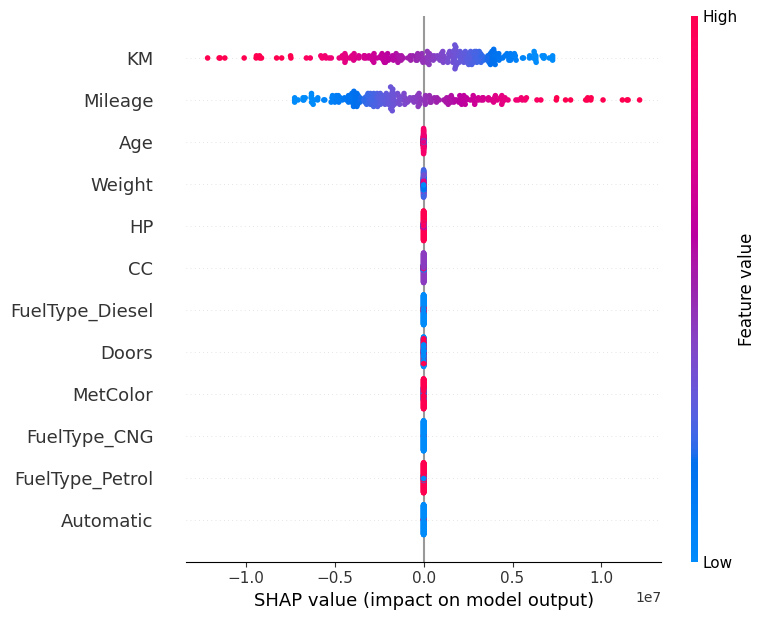

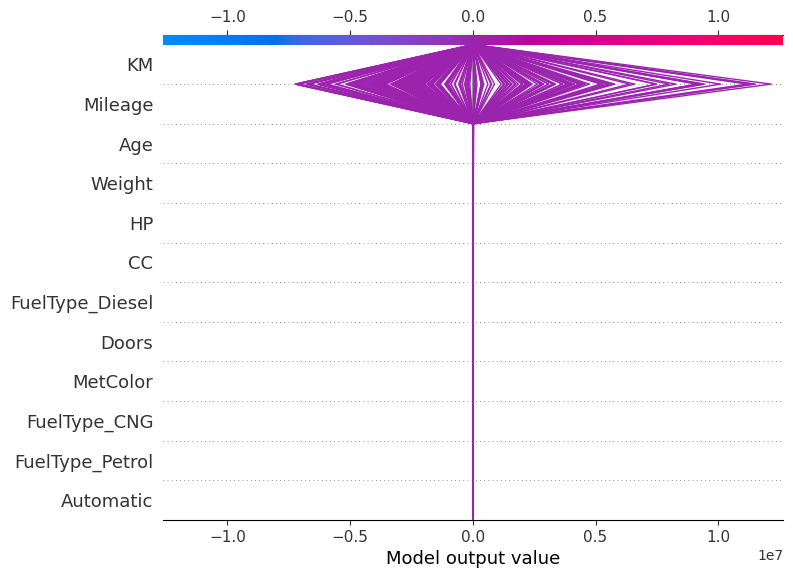

In [ ]:
# I would like to apply shapley value which is a part of game thoery that I have learned in the class computational in telligence
# In linear regression Shapley Value help understand how much each feature contributes to the predicted outcome

import shap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)
lr = LinearRegression()
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)

# Compute Shapley values
explainer = shap.Explainer(lr, x_train)
shap_values = explainer(x_test)

# Summarize the Shapley values in a plot
shap.summary_plot(shap_values, x_test)

shap.decision_plot(explainer.expected_value, shap_values.values, x_test)

In [ ]:
# Regression Diagnostics

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
coefficient = lr.coef_
intercept = lr.intercept_

print(f'The intercept of the model is {intercept}')

print(f'The coefficient of the model is {coefficient}')

The intercept of the model is -797.5132574262279
The coefficient of the model is [ -128.87691864   -68.77050947    60.46894939    75.05437302
   422.59461789    -3.19252375    22.38301268    17.27792339
   110.65084985 -1453.56022765  1747.94256695  -294.3823393 ]


In [ ]:
#Construct the linear regression equation from your model’s coefficients including the intercept.

def calc(slope, intercept, Price):
    return slope*Price+intercept

score = calc(lr.coef_, lr.intercept_, 1000)
print(score)
y_pred = lr.predict(x_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

# this code can quantify the difference between the actual and predicted values to gain an objective view of how it's actually performing.

# We can observe that the predicted percentages are close to the actual ones.

[ -129674.43190229   -69568.02272383    59671.43613061    74256.85976216
   421797.10463752    -3990.03700361    21585.49941935    16480.41013439
   109853.33659639 -1454357.74090634  1747145.05369549  -295179.85256143]
      Actual     Predicted
1176    9250   7298.466582
1014   10450  10028.362543
101    16250  16674.173938
439    12500  10812.159672
58     18950  17887.804259
...      ...           ...
382     8900   9754.414102
865     9500   8102.436705
542    10500  10998.075030
1191    7950   7050.631870
872    10295   9109.409547

[240 rows x 2 columns]


In [ ]:
#Perform diagnostics to assess the assumptions of linear regression,
#such as checking for normality of residuals and homoscedasticity.

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

x1= df[['Mileage', 'Age', 'KM']]
y1 = df['Price']

<Figure size 800x500 with 0 Axes>

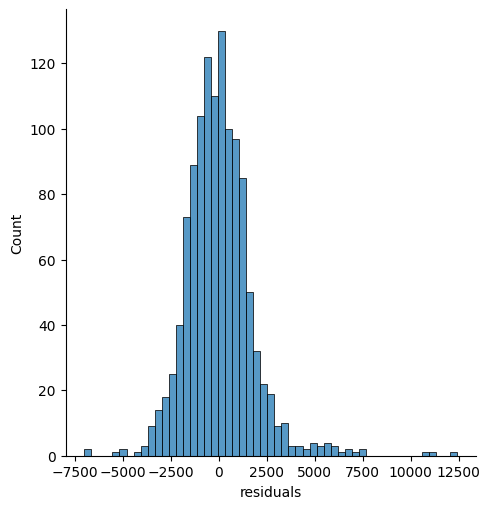

In [ ]:
x1 = sm.add_constant(x1)
model = sm.OLS(y1, x1)
results = model.fit()
residuals = results.resid

plt.figure(figsize=(8, 5))
sns.displot(residuals)
plt.xlabel('residuals')
plt.show()

#  the residual scomputes and visualizes distribution using a probability density plot.
# This helps assess  to assess the goodness of fit of the model and check if the assumptions of linear regression are met

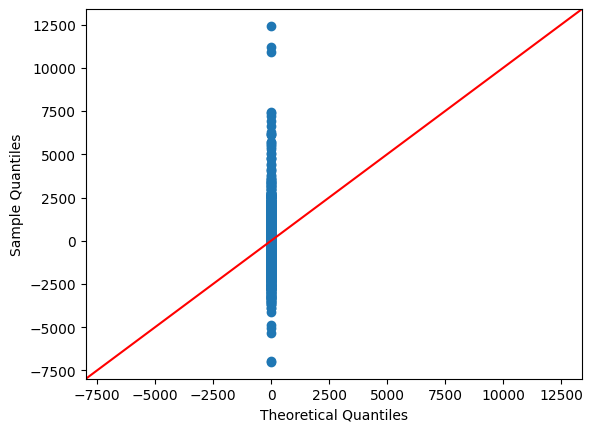

In [ ]:
sm.qqplot(residuals, line='45')
plt.show()

# The Q-Q plot helps evaluate assumptions of linear regression, which is the normality of residuals.

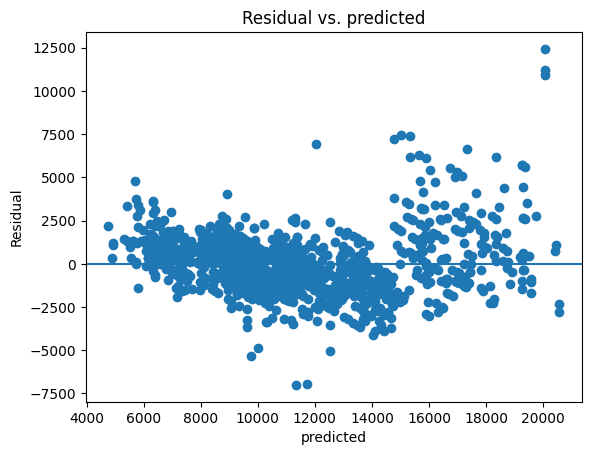

In [ ]:
plt.scatter(results.predict(), residuals)
plt.xlabel('predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. predicted')
plt.show()

# the scatter plot allows to inspect the relationship between the predicted values and the residuals.
# It helps in assessing the performance of the linear regression model by checking if the residuals are randomly distributed.
# The random scatter of points around the horizontal line at y=0, indicating that the predictions are unbiased
# and the residuals are homoscedastic (constant variance)

  variables           VIF
0     const  9.442059e+00
1   Mileage  7.456927e+09
2       Age  1.578213e+00
3        KM  7.456927e+09


<ipython-input-50-cdb74371d9f3>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


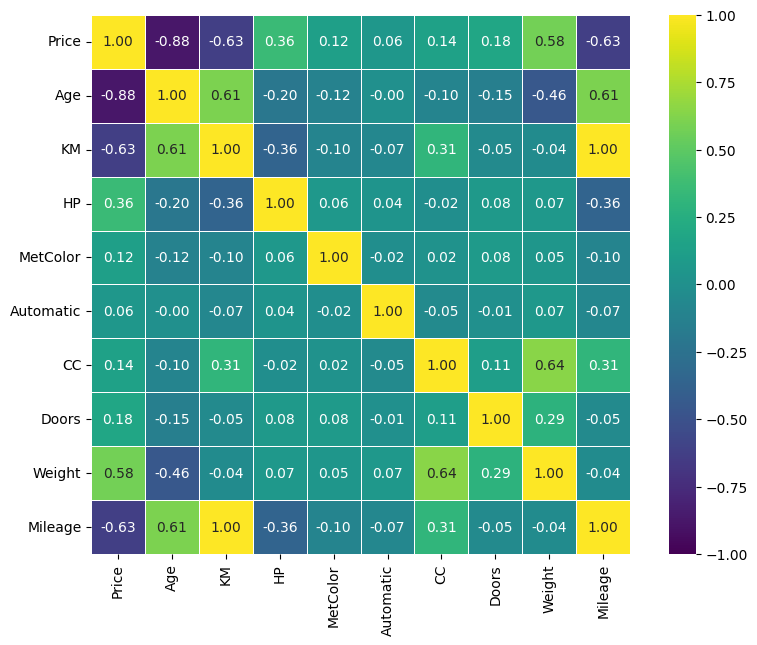

In [ ]:
# Visualize the correlation matrix and the Variance Inflation Factor (VIF) to identify potential multicollinearity issues.

import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import matplotlib.pyplot as plt

x2 = df[['Mileage', 'Age', 'KM']]
x2 = sm.add_constant(x2)

vif = pd.DataFrame()
vif["variables"] = x2.columns
vif["VIF"] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
print(vif)

corrMatrix = df.corr()
plt.figure(figsize=(10, 7))

sns.heatmap(corrMatrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

# This code snippet calculates the Variance Inflation Factor (VIF) to assess multicollinearity in a linear regression model
# and visualizes the correlation matrix of the dataset using a heatmap

In [ ]:
# Before diagnostics

import statsmodels.formula.api as smf

model_before = smf.ols(formula='Price ~  KM + Age + Mileage', data=df)
results_before = model_before.fit()

# The code of model_after = smf.ols is using the ols function from the statsmodels.formula.api module
# to create an Ordinary Least Squares (OLS) regression model.

In [ ]:
# After diagnostics

df_updated = df[['Mileage', 'Age', 'KM', 'Price']]
model_after = smf.ols(formula='Price ~  KM + Age + Mileage', data=df_updated)
results_after = model_after.fit()

#this  code is creating an OLS regression model where ‘Price’ is the dependent variable
# and ‘Age’, ‘KM’, ‘HP’, Price and ‘Weight’ are the independent variables,
# using the data from the DataFrame df_updated. The model is then stored in the variable model_after

In [ ]:
print("BEFORE DIAGNOSTICS")
print(results_before.summary())
print("\nAFTER DIAGNOSTICS")
print(results_after.summary())

#the goal is to make the model better at predicting the dependent variable,
# not to make these statistics look good. Always check the performance of your model

BEFORE DIAGNOSTICS
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     1442.
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:59:04   Log-Likelihood:                -10639.
No. Observations:                1198   AIC:                         2.129e+04
Df Residuals:                    1194   BIC:                         2.131e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.075e+04    154.790 